In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

import functions as f
import classes as c

In [4]:
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")

In [35]:
train_df.shape, test_df.shape

((891, 13), (418, 11))

In [36]:
f.columns_with_missing_values(train_df), f.columns_with_missing_values(test_df)

(['Age', 'Cabin', 'Embarked', 'PcEmbarked'], ['Age', 'Fare', 'Cabin'])

In [32]:
corr_matrix = train_df.corr()

In [33]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
PcEmbarked     889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
nominal_col = ["Pclass", "Embarked"]
binary_col = ["Sex"]
ordinal_col = ["Ticket"]
count_col = ["Age", "SibSp", "Parch"]
interval_col = ["Fare"]
time_col = []

In [44]:
train_df["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
5                330877
6                 17463
7                349909
8                347742
9                237736
10              PP 9549
11               113783
12            A/5. 2151
13               347082
14               350406
15               248706
16               382652
17               244373
18               345763
19                 2649
20               239865
21               248698
22               330923
23               113788
24               349909
25               347077
26                 2631
27                19950
28               330959
29               349216
             ...       
861               28134
862               17466
863            CA. 2343
864              233866
865              236852
866       SC/PARIS 2149
867            PC 17590
868              345777
869              347742
870              349248
871             

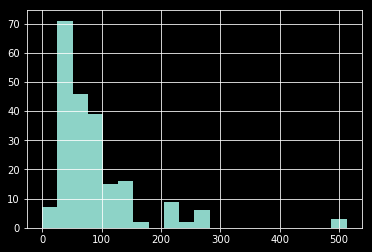

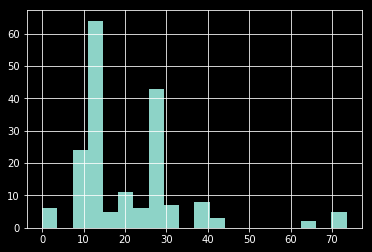

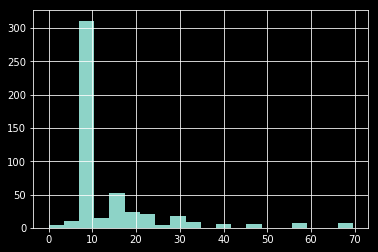

In [52]:
plt.figure(1)
train_df.loc[train_df["Pclass"] == 1, "Fare"].hist(bins=20)
plt.figure(2)
train_df.loc[train_df["Pclass"] == 2, "Fare"].hist(bins=20)
plt.figure(3)
train_df.loc[train_df["Pclass"] == 3, "Fare"].hist(bins=20)